In [1]:
import os
import sys
import pandas as pd
from pathlib import Path
from datetime import datetime

sys.path.append(os.path.abspath(".."))

from utils.dataset.config import DatasetPath
from utils.dataset.clickstream_generator import generate_clickstream

# Dataset Path
- `recsys/data/dataset/` 하위 경로 생성

In [2]:
current_dir = os.path.abspath(os.curdir)
base_dir = "/".join(current_dir.split("/")[:-1])
dataset_dir = Path(base_dir).joinpath("data/dataset")

paths = DatasetPath(base_dir=dataset_dir, dataset_name="fashion")

# Clickstream Dataset
- 가상의 클릭 스트림 데이터 생성

In [3]:
generate_clickstream(
    user_metadata_path=paths.user_metadata_path,
    item_metadata_path=paths.item_metadata_path,
    save_path=paths.interactions_path,
    users_per_partition=1000,
    n_sessions_per_user=5,
    actions=["click", "wishlist", "cart", "purchase"],
    action_weights=[0.8, 0.1, 0.05, 0.05],
    similarity_keys=["category", "style", "color"],
    start_date=datetime(2025, 9, 1),
    seed=42,
)

# Load Dataset

In [4]:
df = pd.read_parquet(paths.interactions_path)

In [5]:
df.shape

(161538, 14)

In [6]:
df.head()

,user_id,item_id,timestamp,action,age,gender,title,color,style,fit,material,season,sleeve,category
0,1,3507,2025-09-21 03:01:00,click,46,F,슬림핏 실루엣의 데님 오버롤,레드,스포티,슬림핏,데님,겨울,롱슬리브,오버롤
1,1,9867,2025-09-21 03:02:00,click,46,F,봄 슬림핏 레드 나일론 롱슬리브 오버롤,레드,스포티,슬림핏,나일론,봄,롱슬리브,오버롤
2,1,3471,2025-09-02 00:05:00,click,46,F,"간절기 시즌, 레트로 무드의 오렌지 퍼 롱슬리브 루즈핏 원피스",오렌지,레트로,루즈핏,퍼,간절기,롱슬리브,원피스
3,1,6462,2025-09-02 00:09:00,click,46,F,"트렌디한 레트로룩, 슬림핏 원피스 in 여름",오렌지,레트로,슬림핏,스웨이드,여름,숏슬리브,원피스
4,1,441,2025-09-19 08:51:00,click,46,F,"봄 시즌, 캐주얼 무드의 와인 스웨이드 롱슬리브 루즈핏 슬랙스",와인,캐주얼,루즈핏,스웨이드,봄,롱슬리브,슬랙스


# EDA

## Item Frequency

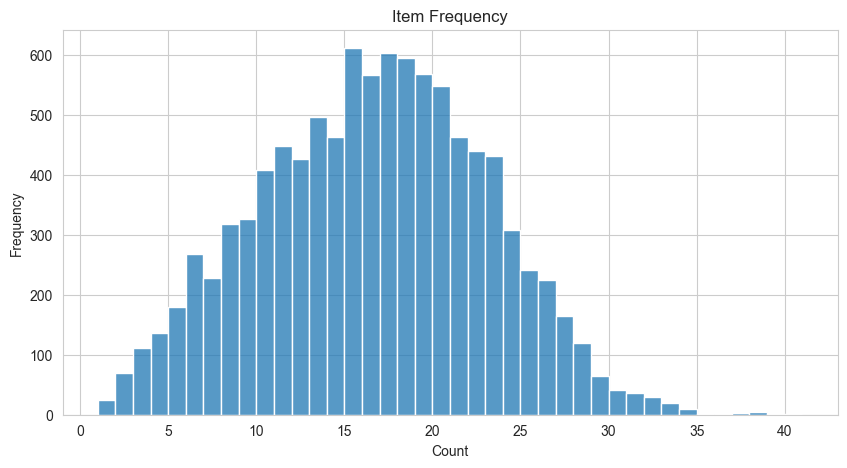

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(x=df["item_id"].value_counts(), binwidth=1)
plt.title("Item Frequency")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()